# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [141]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [142]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
189,190,Female,36,103,85
150,151,Male,43,78,17
153,154,Female,38,78,76
176,177,Male,58,88,15
63,64,Female,54,47,59
52,53,Female,31,43,54
38,39,Female,36,37,26
57,58,Male,69,44,46
195,196,Female,35,120,79
104,105,Male,49,62,56


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [144]:
df.rename(columns={"CustomerID" : "Customer_ID",
                   "Annual Income (k$)" : "Annual_Income",
                   "Spending Score (1-100)" : "Spending_Score"}, inplace=True)

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [146]:
df.drop(columns="Customer_ID").corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


In [147]:
df.Customer_ID.duplicated().sum()

0

In [148]:
df0 = df.copy()

In [149]:
df0.set_index("Customer_ID", drop=True, inplace=True)

In [150]:
df0.head()

,Gender,Age,Annual_Income,Spending_Score
Customer_ID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [151]:
df0.isna().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

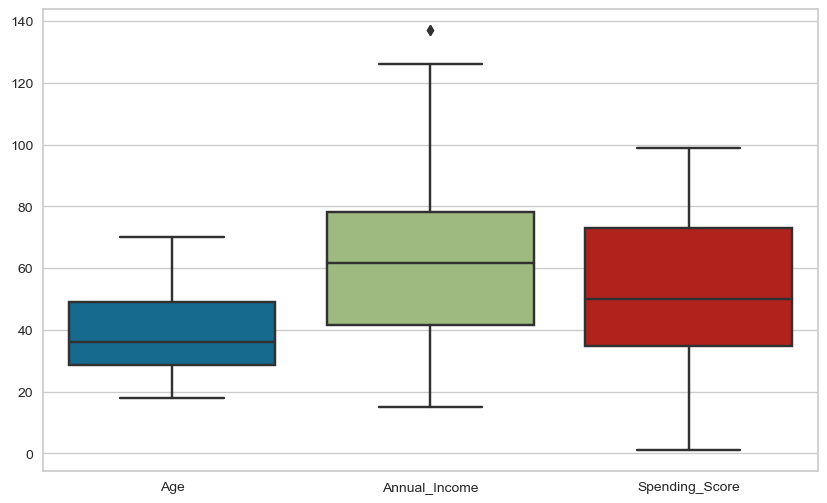

In [152]:
sns.boxplot(df0);

In [153]:
df0[df0.Annual_Income>130]

,Gender,Age,Annual_Income,Spending_Score
Customer_ID,,,,
199,Male,32,137,18
200,Male,30,137,83


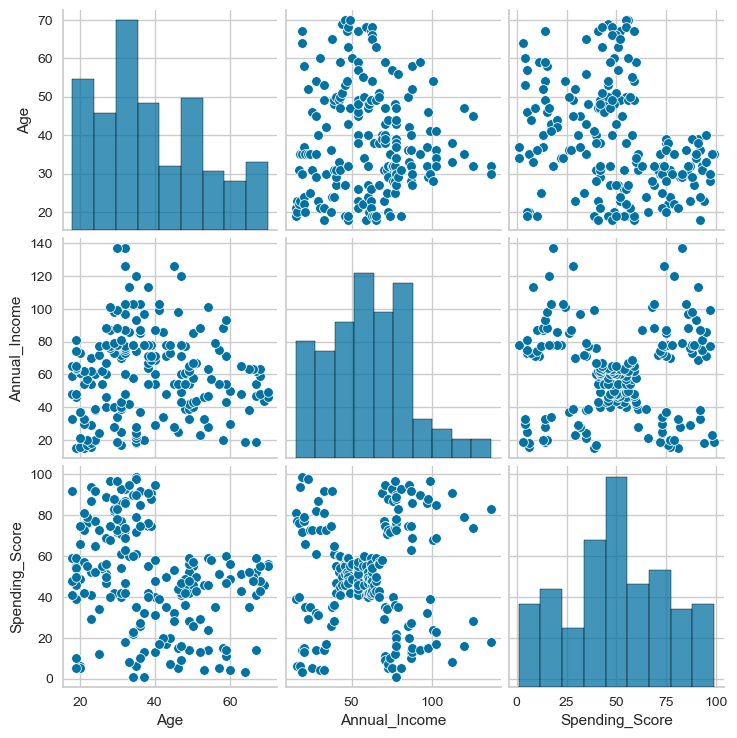

In [154]:
sns.pairplot(df0);

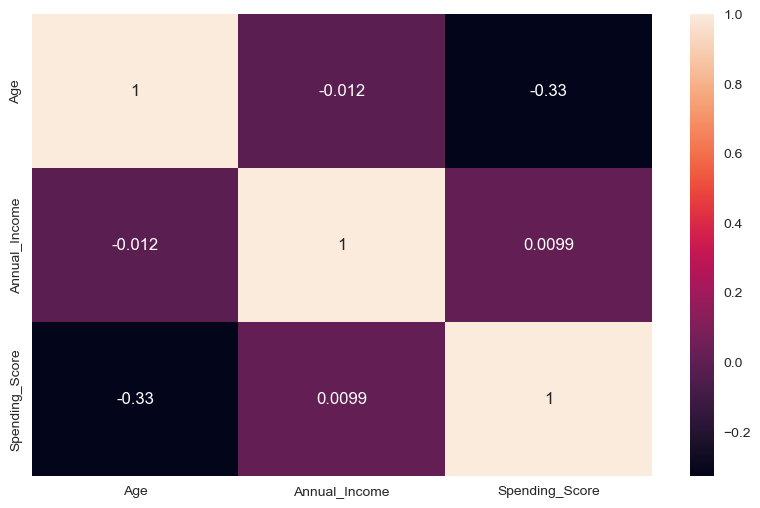

In [155]:
sns.heatmap(df0.corr(), annot=True);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [156]:
X = df0[["Age", "Spending_Score"]]
X.sample(5)

,Age,Spending_Score
Customer_ID,,
199,32,18
46,24,65
99,48,42
173,36,10
161,56,35


#### Scaling

In [157]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Hopkins Test

In [158]:
from sklearn.neighbors import BallTree

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [159]:
hopkins(X, X.shape[0])

0.30933833085805634

#### *ii. Determine optimal number of clusters*

#### Elbow metod

In [160]:
from sklearn.cluster import KMeans

In [161]:
ssd_X = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd_X.append(model.inertia_)

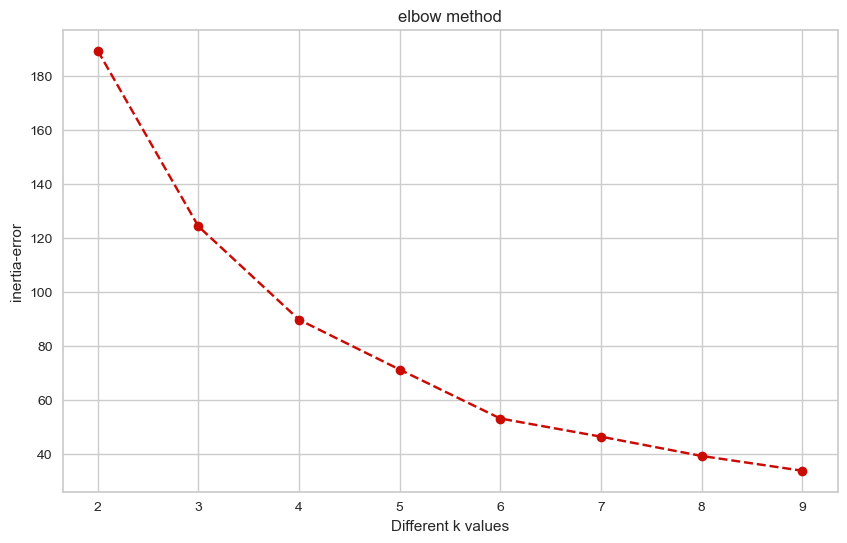

In [162]:
plt.plot(K, ssd_X, "ro--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [163]:
pd.Series(ssd_X).diff()

0          NaN
1   -65.061204
2   -34.561069
3   -18.469651
4   -18.121828
5    -6.727452
6    -7.140412
7    -5.469426
dtype: float64

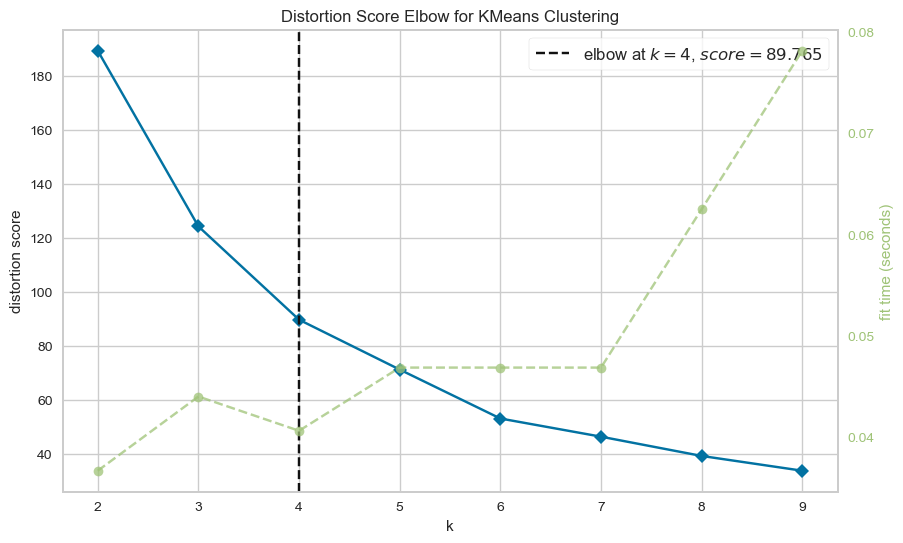

In [164]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)
visualizer.poof();

### Why silhouette_score is negative?

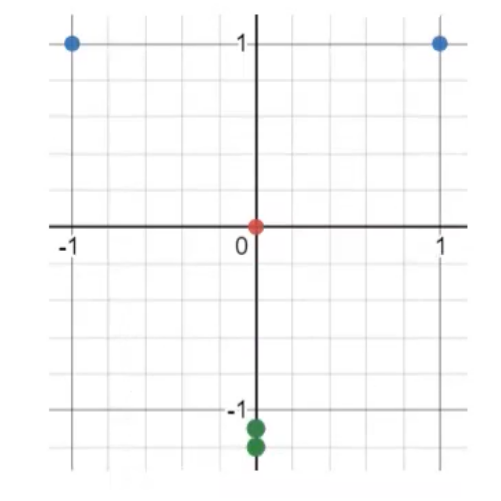

In [165]:
from sklearn.metrics import silhouette_score

In [166]:
K_means_model = KMeans(n_clusters=6, random_state=42)

In [167]:
K_means_model.fit(X)

KMeans(n_clusters=6, random_state=42)

In [168]:
K_means_model.predict(X)

array([1, 5, 3, 5, 1, 5, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 1, 0, 5, 3, 5,
       0, 5, 0, 5, 2, 1, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 5, 4, 5, 2, 1,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 4, 2, 2, 2, 4, 1, 2, 4, 1, 4, 2, 4, 1,
       2, 4, 1, 1, 4, 2, 4, 4, 4, 1, 2, 2, 1, 2, 4, 2, 4, 2, 1, 2, 2, 1,
       1, 2, 4, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 4, 1, 2, 1, 4, 2, 4, 4,
       4, 1, 2, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 5, 3, 5, 2, 5, 0, 5, 0, 5,
       1, 5, 3, 5, 0, 5, 3, 5, 0, 5, 1, 5, 3, 5, 2, 5, 3, 5, 0, 5, 0, 5,
       0, 5, 3, 5, 3, 5, 2, 5, 3, 5, 0, 5, 3, 5, 3, 1, 3, 5, 3, 5, 0, 5,
       0, 5, 0, 5, 3, 5, 0, 5, 2, 5, 0, 5, 3, 5, 3, 5, 3, 5, 0, 5, 2, 5,
       3, 5])

In [169]:
K_means_model.labels_

array([1, 5, 3, 5, 1, 5, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 1, 0, 5, 3, 5,
       0, 5, 0, 5, 2, 1, 3, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 5, 4, 5, 2, 1,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 4, 2, 2, 2, 4, 1, 2, 4, 1, 4, 2, 4, 1,
       2, 4, 1, 1, 4, 2, 4, 4, 4, 1, 2, 2, 1, 2, 4, 2, 4, 2, 1, 2, 2, 1,
       1, 2, 4, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 4, 1, 2, 1, 4, 2, 4, 4,
       4, 1, 2, 1, 1, 1, 4, 2, 2, 2, 1, 2, 2, 5, 3, 5, 2, 5, 0, 5, 0, 5,
       1, 5, 3, 5, 0, 5, 3, 5, 0, 5, 1, 5, 3, 5, 2, 5, 3, 5, 0, 5, 0, 5,
       0, 5, 3, 5, 3, 5, 2, 5, 3, 5, 0, 5, 3, 5, 3, 1, 3, 5, 3, 5, 0, 5,
       0, 5, 0, 5, 3, 5, 0, 5, 2, 5, 0, 5, 3, 5, 3, 5, 3, 5, 0, 5, 2, 5,
       3, 5])

In [170]:
silhouette_score(X, K_means_model.labels_)

0.4531637132837109

In [171]:
range_n_clusters = range(2,10)
for n in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={n}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433
For n_clusters=9, the silhouette score is 0.4230225675027671


##### it looks like n_clusters=3 could be tried

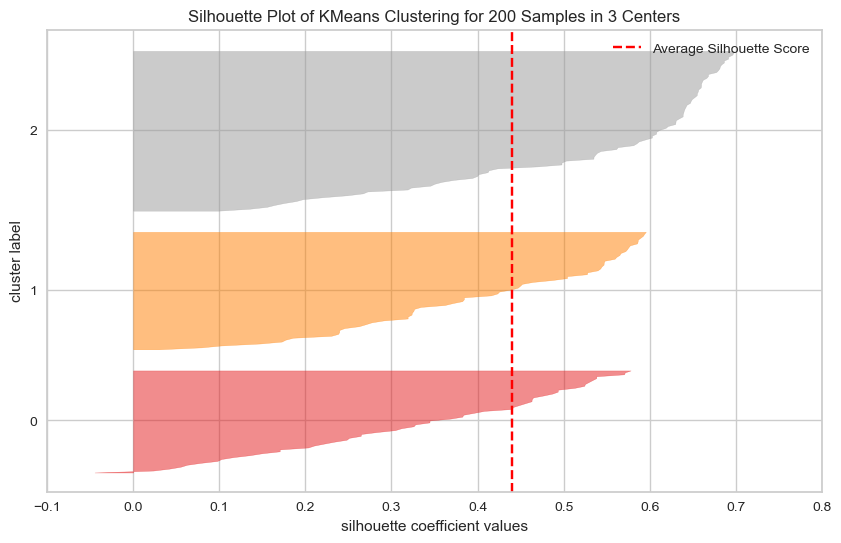

In [172]:
from yellowbrick.cluster import SilhouetteVisualizer

model_with_n_3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model_with_n_3)

visualizer.fit(X)    
visualizer.poof();

#### *iii. Apply K Means*

In [173]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit_predict(X)

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [174]:
X1 = df0[df0["Gender"] == "Female"][["Annual_Income", "Spending_Score"]]
X1.sample(5)

,Annual_Income,Spending_Score
Customer_ID,,
158,78,78
107,63,50
67,48,50
123,69,58
194,113,91


In [175]:
X2 = df0[df0["Gender"] == "Male"][["Annual_Income", "Spending_Score"]]
X2.sample(5)

,Annual_Income,Spending_Score
Customer_ID,,
62,46,55
188,101,68
60,46,46
109,63,43
19,23,29


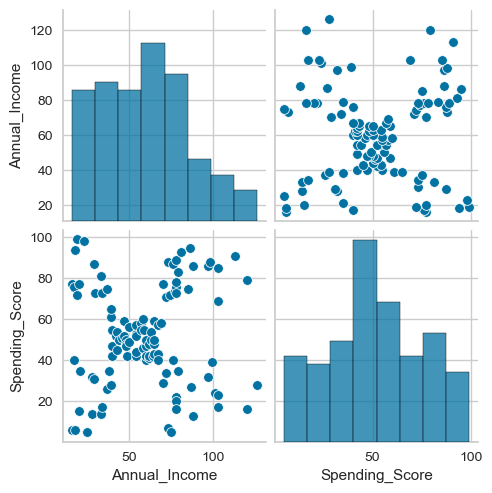

In [176]:
sns.pairplot(X1);

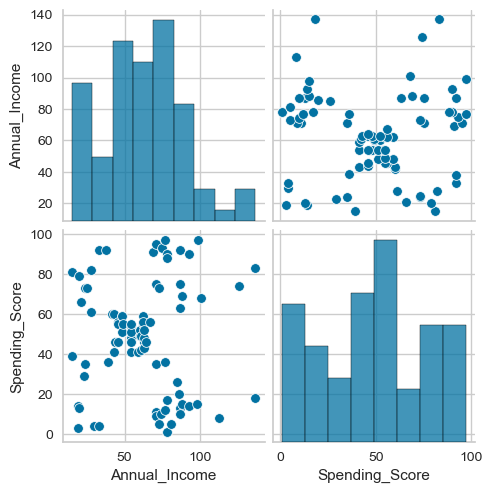

In [177]:
sns.pairplot(X2);

#### Scaling

In [178]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

#### Hopkins 

In [179]:
hopkins(X1, X1.shape[0])

0.34766680315804876

In [180]:
hopkins(X2, X2.shape[0])

0.3206164720246125

#### *ii. Determine optimal number of clusters*

In [181]:
ssd_X1 = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd_X1.append(model.inertia_)

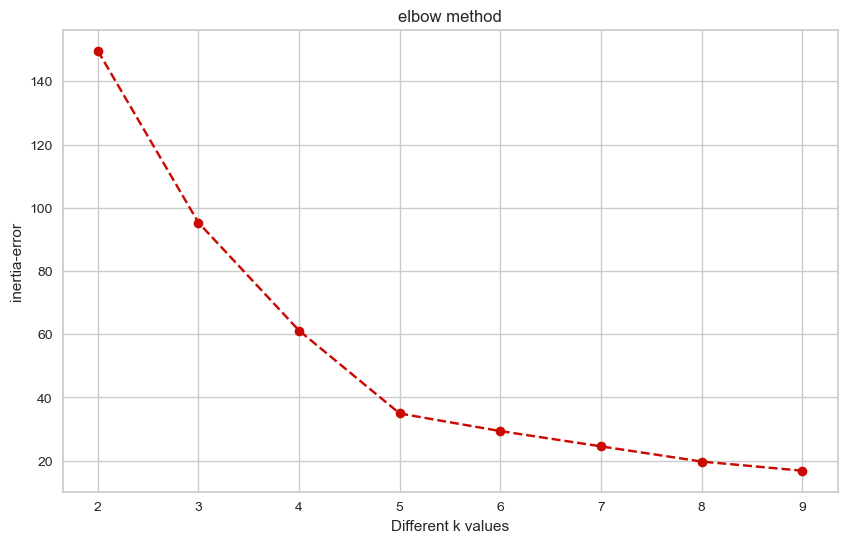

In [182]:
plt.plot(K, ssd_X1, "ro--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [183]:
ssd_X2 = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd_X2.append(model.inertia_)

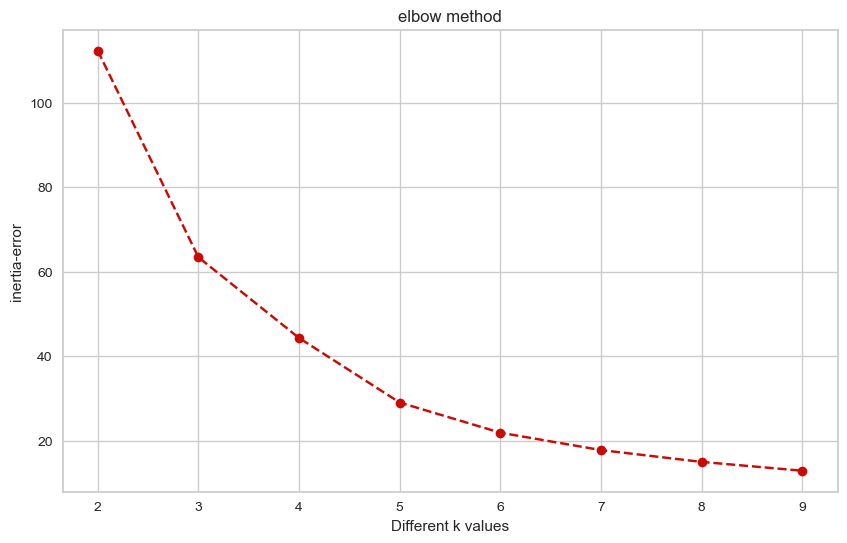

In [184]:
plt.plot(K, ssd_X2, "ro--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

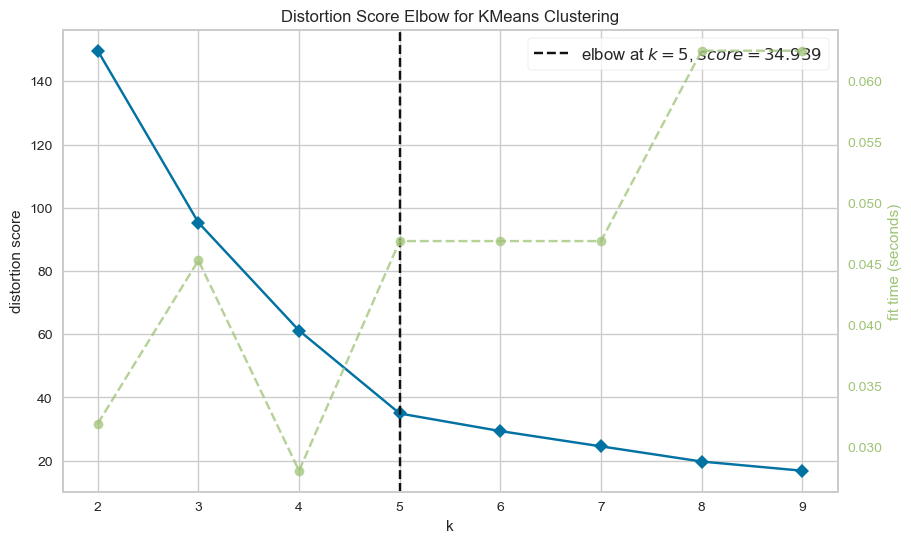

In [185]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X1) 
visualizer.poof();

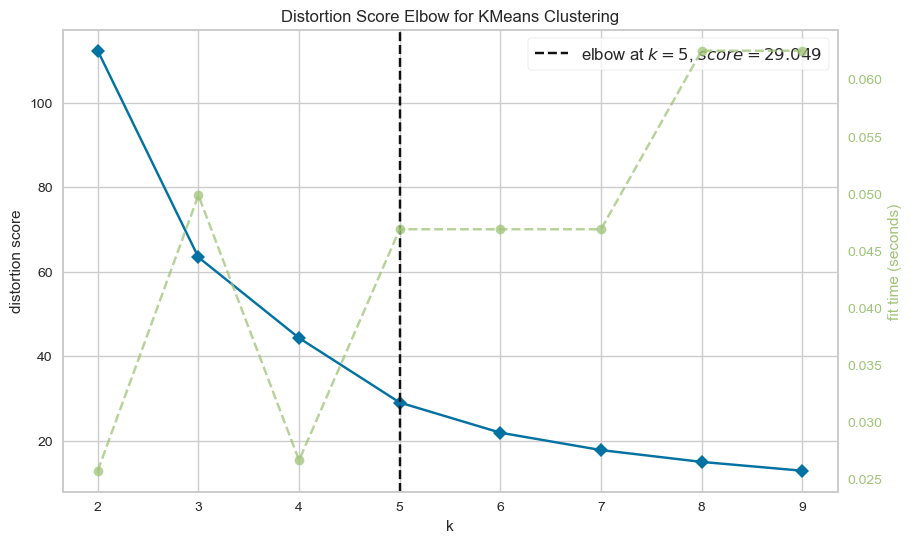

In [186]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X2) 
visualizer.poof();

In [187]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [188]:
K_means_model.fit(X1)

KMeans(n_clusters=5, random_state=42)

In [189]:
K_means_model.predict(X1)

array([3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       4, 0])

In [190]:
silhouette_score(X1, K_means_model.labels_)

0.5449371500611009

In [191]:
range_n_clusters = range(2,10)
for n in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X1)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={n}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968238129395705
For n_clusters=3, the silhouette score is 0.441682801419838
For n_clusters=4, the silhouette score is 0.4915673877114573
For n_clusters=5, the silhouette score is 0.5449371500611009
For n_clusters=6, the silhouette score is 0.528837275302729
For n_clusters=7, the silhouette score is 0.5145724765166632
For n_clusters=8, the silhouette score is 0.44903589386189563
For n_clusters=9, the silhouette score is 0.4552960481469213


In [192]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [193]:
K_means_model.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [194]:
K_means_model.predict(X2)

array([4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1])

In [195]:
silhouette_score(X2, K_means_model.labels_)

0.566431413628382

In [196]:
range_n_clusters = range(2,10)
for n in range_n_clusters:

    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={n}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4139831757017104
For n_clusters=3, the silhouette score is 0.4884731696758509
For n_clusters=4, the silhouette score is 0.5205848922656579
For n_clusters=5, the silhouette score is 0.566431413628382
For n_clusters=6, the silhouette score is 0.5780398306945435
For n_clusters=7, the silhouette score is 0.5802358998640909
For n_clusters=8, the silhouette score is 0.488769538756391
For n_clusters=9, the silhouette score is 0.475171647262754


##### it looks like n=5 is suitable

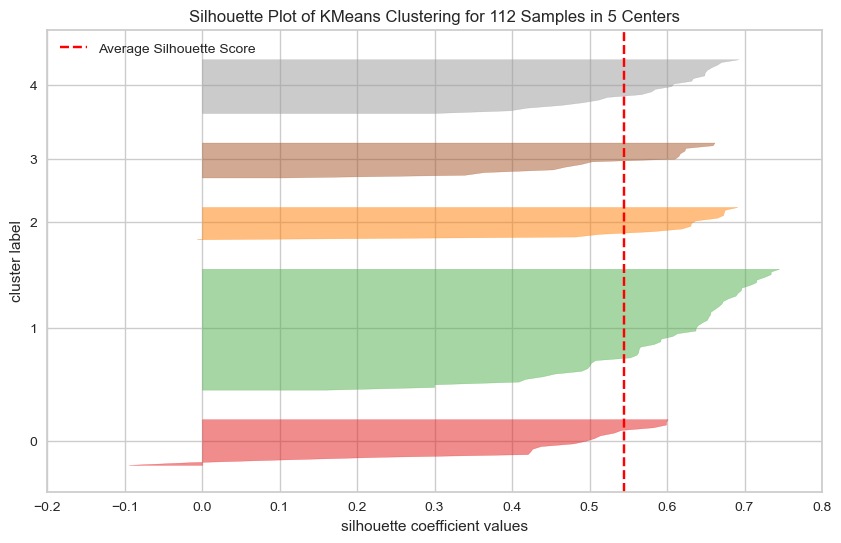

In [197]:
from yellowbrick.cluster import SilhouetteVisualizer

model_X1_with_n_5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model_X1_with_n_5)

visualizer.fit(X1)    
visualizer.poof();

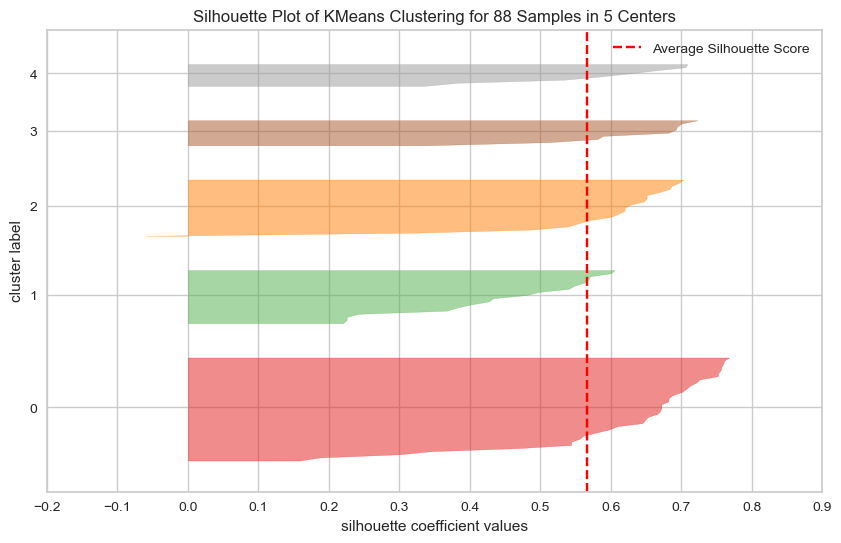

In [198]:
from yellowbrick.cluster import SilhouetteVisualizer

model_X2_with_n_5 = KMeans(n_clusters=5, random_state=42) 
visualizer = SilhouetteVisualizer(model_X2_with_n_5)

visualizer.fit(X2)    
visualizer.poof();

#### *iii. Apply K Means*

In [199]:
model_X1 = KMeans(n_clusters = 5, random_state=42)
model_X1.fit_predict(X1)

array([3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       4, 0])

In [200]:
model_X2 = KMeans(n_clusters = 5, random_state=42)
model_X2.fit_predict(X2)

array([4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [201]:
model_X1.labels_

array([3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       4, 0])

In [202]:
clusters_X1 = model_X1.labels_

In [203]:
X1 = pd.DataFrame(X1, columns=["Annual_Income", "Spending_Score"])

In [204]:
X1["Predicted_Clusters"] = clusters_X1

In [205]:
X1.sample(3)

,Annual_Income,Spending_Score,Predicted_Clusters
87,0.724062,-1.479848,0
1,-1.670170,1.061072,2
70,0.299279,0.227984,1


In [206]:
model_X2.labels_

array([4, 3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1])

In [207]:
clusters_X2 = model_X2.labels_

In [208]:
X2 = pd.DataFrame(X2, columns=["Annual_Income", "Spending_Score"])

In [209]:
X2["Predicted_Clusters"] = clusters_X2

In [210]:
X2.sample(3)

,Annual_Income,Spending_Score,Predicted_Clusters
58,0.406724,0.882861,1
7,-1.481024,-0.703421,4
86,2.823041,-1.099992,2


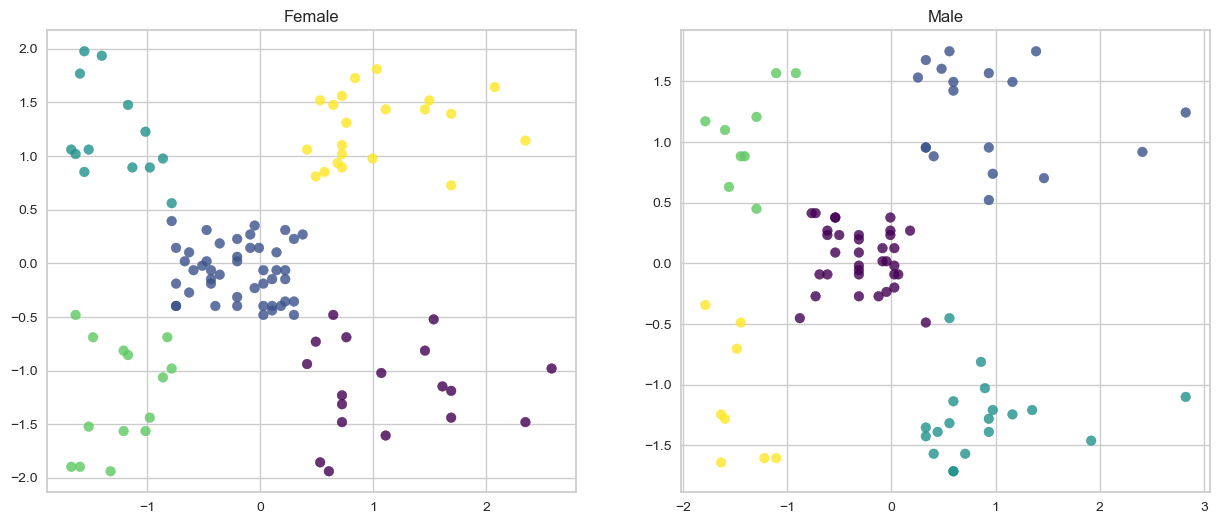

In [211]:
plt.figure(figsize = (15,6))

plt.subplot(121)
plt.scatter(X1["Annual_Income"], X1["Spending_Score"], c = X1.Predicted_Clusters, cmap = "viridis", alpha=0.8)
plt.title("Female")

plt.subplot(122)
plt.scatter(X2["Annual_Income"], X2["Spending_Score"], c = X2.Predicted_Clusters, cmap = "viridis", alpha=0.8)
plt.title("Male");

In [212]:
model_X1.cluster_centers_

array([[ 1.15099068, -1.15818314],
       [-0.1817501 , -0.08351907],
       [-1.29588563,  1.20846472],
       [-1.23159527, -1.24182259],
       [ 1.03483425,  1.25545945]])

In [213]:
model_X2.cluster_centers_

array([[-0.28285935,  0.04836638],
       [ 0.93948832,  1.23136254],
       [ 0.89356415, -1.28214853],
       [-1.37614921,  1.05110319],
       [-1.48574347, -1.11351116]])

In [214]:
centers_X1 = model_X1.cluster_centers_

In [215]:
centers_X2 = model_X2.cluster_centers_

In [216]:
centers_X1[:,0]

array([ 1.15099068, -0.1817501 , -1.29588563, -1.23159527,  1.03483425])

In [217]:
centers_X1[:,1]

array([-1.15818314, -0.08351907,  1.20846472, -1.24182259,  1.25545945])

In [218]:
centers_X2[:,0]

array([-0.28285935,  0.93948832,  0.89356415, -1.37614921, -1.48574347])

In [219]:
centers_X2[:,1]

array([ 0.04836638,  1.23136254, -1.28214853,  1.05110319, -1.11351116])

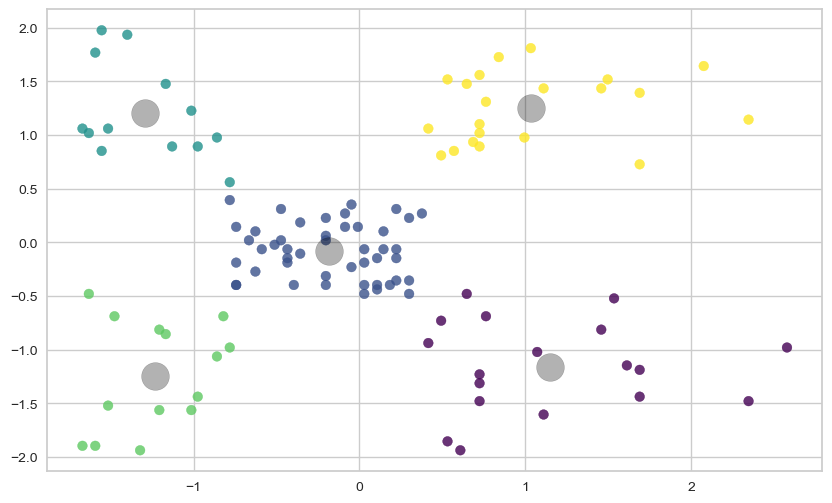

In [220]:
plt.scatter(X1["Annual_Income"], X1["Spending_Score"], c = X1.Predicted_Clusters, cmap = "viridis", alpha=0.8)
plt.scatter(centers_X1[:, 0], centers_X1[:, 1], c='black', s=400, alpha=0.3)
plt.show()

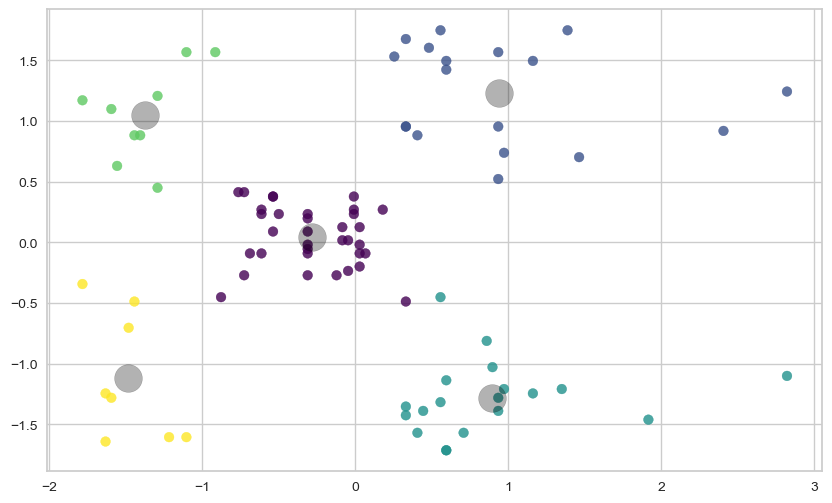

In [221]:
plt.scatter(X2["Annual_Income"], X2["Spending_Score"], c = X2.Predicted_Clusters, cmap = "viridis", alpha=0.8)
plt.scatter(centers_X2[:, 0], centers_X2[:, 1], c='black', s=400, alpha=0.3)
plt.show()

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [222]:
X = df0[["Age", "Spending_Score"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [223]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [224]:
hc_ward = linkage(X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

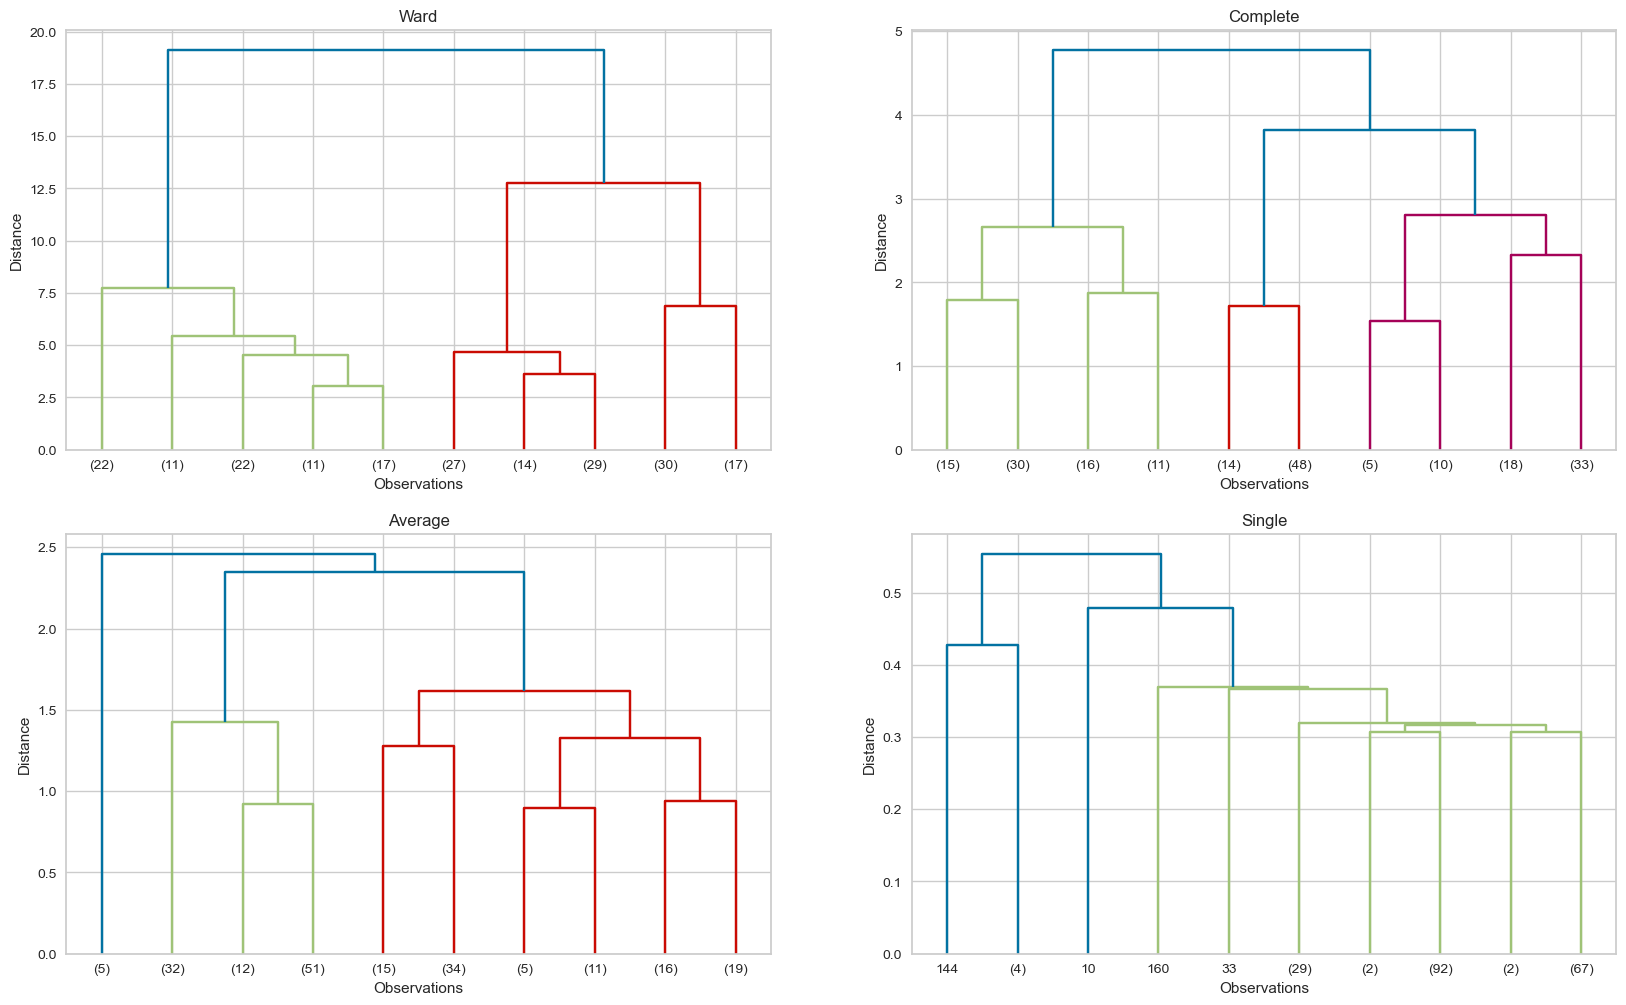

In [225]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

In [226]:
X1 = df0[df0["Gender"] == "Female"][["Annual_Income", "Spending_Score"]]
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [227]:
X2 = df0[df0.Gender=="Male"][["Annual_Income", "Spending_Score"]]
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [228]:
hc_ward1 = linkage(X1, method = "ward")
hc_ward2 = linkage(X2, method = "ward")

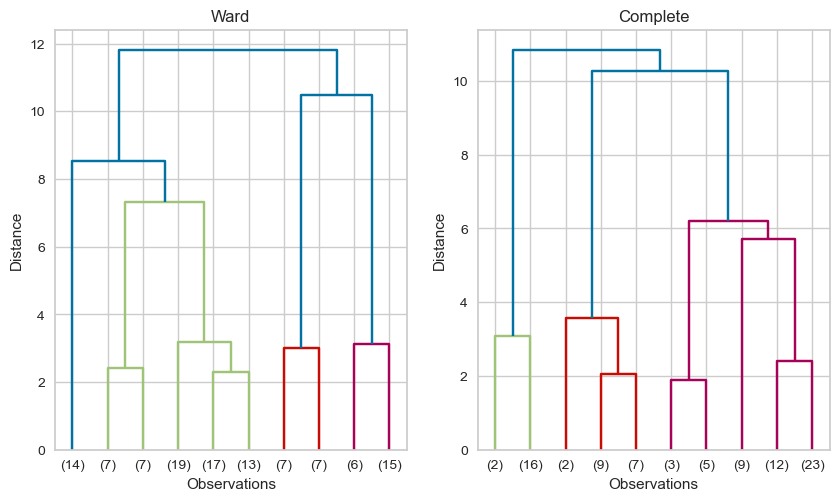

In [229]:
plt.figure(figsize = (10,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward1, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [230]:
from sklearn.cluster import AgglomerativeClustering

In [231]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


##### decided to go on with n=3

In [232]:
model_X = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model_X.fit_predict(X)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

#### Annual Income and Spending Score- x2

In [233]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.3774234086927909
Silhouette Score for 3 clusters: 0.4386626026533738
Silhouette Score for 4 clusters: 0.4851142932192257
Silhouette Score for 5 clusters: 0.5413099723087491
Silhouette Score for 6 clusters: 0.43508448967295227
Silhouette Score for 7 clusters: 0.4268050737890365
Silhouette Score for 8 clusters: 0.43411319384727765
Silhouette Score for 9 clusters: 0.4279704709971228


In [234]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.4097771926916266
Silhouette Score for 3 clusters: 0.48423185374521965
Silhouette Score for 4 clusters: 0.5148079738198256
Silhouette Score for 5 clusters: 0.5667260668882863
Silhouette Score for 6 clusters: 0.5762370103158553
Silhouette Score for 7 clusters: 0.5797432697783578
Silhouette Score for 8 clusters: 0.4898286133439785
Silhouette Score for 9 clusters: 0.4701459083061417


##### decided to go on with n=5

In [235]:
model_X1 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model_X1.fit_predict(X1)

array([4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2], dtype=int64)

In [236]:
model_X2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model_X2.fit_predict(X2)

array([3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [237]:
model_X_agg = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model_X_agg.fit_predict(X)
clusters_X_agg = model_X_agg.labels_

In [238]:
X = pd.DataFrame(X, columns=["Age", "Spending_Score"])
X["Predicted_Clusters"] = clusters_X_agg

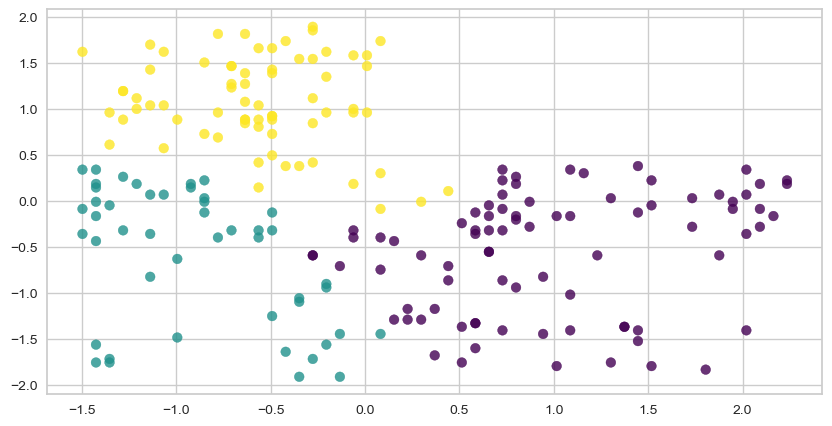

In [239]:
plt.figure(figsize=(10,5))
plt.scatter(X["Age"], X["Spending_Score"], c = X.Predicted_Clusters, cmap = "viridis", alpha=0.8);

<Figure size 1000x500 with 0 Axes>

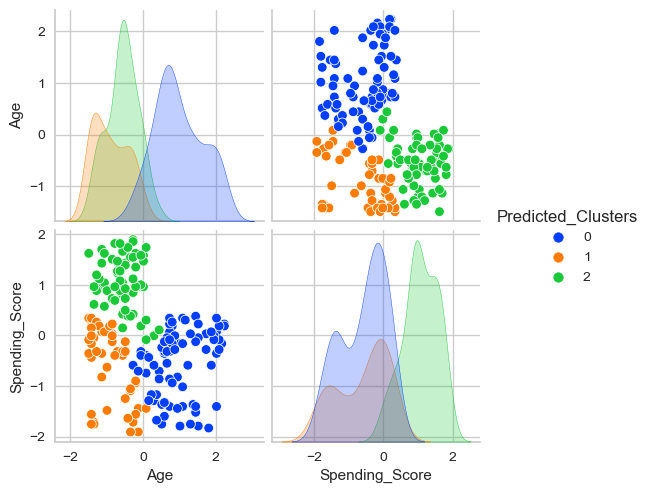

In [240]:
plt.figure(figsize = (10,5))
sns.pairplot(X, hue= "Predicted_Clusters", palette="bright");

#### Annual Income and Spending Score- x2

In [241]:
model_X1_agg = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model_X1_agg.fit_predict(X1)
clusters_X1_agg = model_X1_agg.labels_

In [242]:
model_X2_agg = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model_X2_agg.fit_predict(X2)
clusters_X2_agg = model_X2_agg.labels_

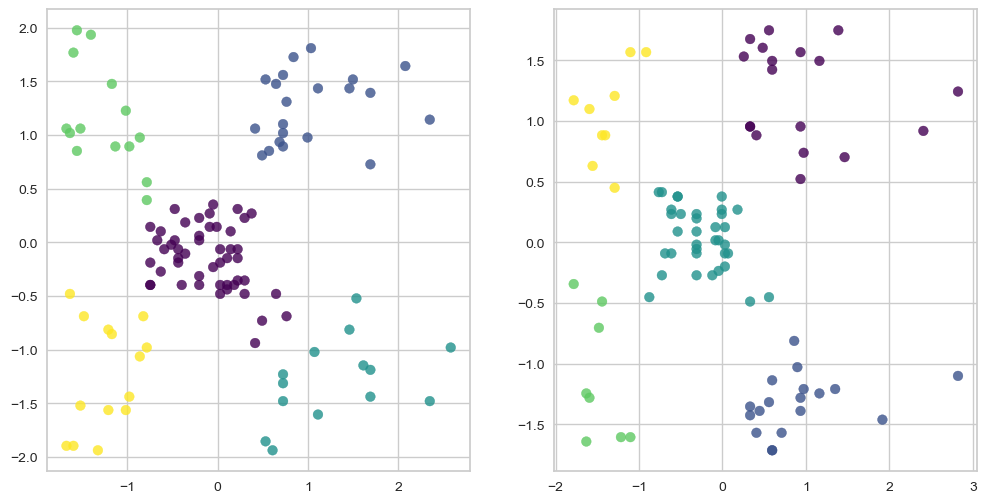

In [243]:
X1 = pd.DataFrame(X1, columns=["Annual_Income", "Spending_Score"])
X1["Predicted_Clusters"] = clusters_X1_agg

X2 = pd.DataFrame(X2, columns=["Annual_Income", "Spending_Score"])
X2["Predicted_Clusters"] = clusters_X2_agg

plt.figure(figsize = (12,6))
plt.subplot(121)
plt.scatter(X1["Annual_Income"], X1["Spending_Score"], c = X1.Predicted_Clusters, cmap = "viridis", alpha=0.8)


plt.subplot(122)
plt.scatter(X2["Annual_Income"], X2["Spending_Score"], c = X2.Predicted_Clusters, cmap = "viridis", alpha=0.8)

plt.show()

<Figure size 1000x500 with 0 Axes>

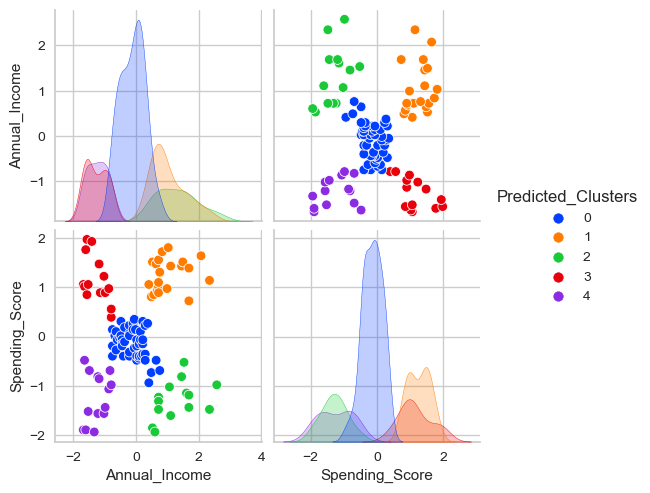

In [244]:
plt.figure(figsize = (10,5))
sns.pairplot(X1, hue= "Predicted_Clusters", palette="bright");

<Figure size 1000x500 with 0 Axes>

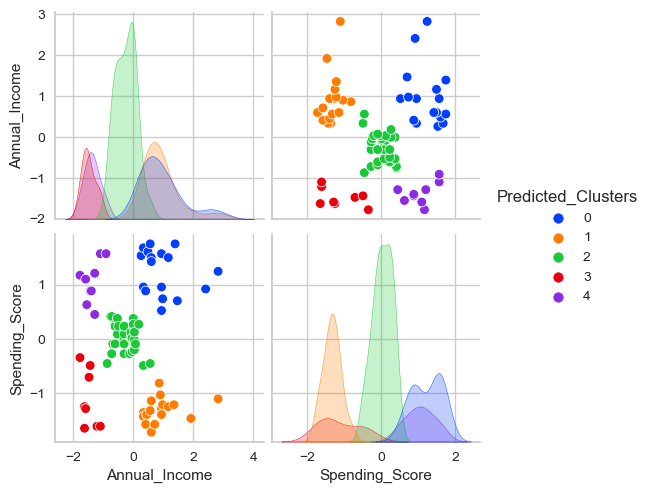

In [245]:
plt.figure(figsize = (10,5))
sns.pairplot(X2, hue= "Predicted_Clusters", palette="bright");

#### Interpretation based on Age and Spending Score- x1

In [246]:
X = df0[["Age", "Spending_Score"]]

In [247]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [248]:
model_X = KMeans(n_clusters = 5, random_state=42)
model_X.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [249]:
clusters_X = model_X.labels_

In [250]:
X = df0[["Age", "Spending_Score", "Annual_Income"]]

In [251]:
X["Predicted_Clusters"] = clusters_X

In [252]:
X.groupby("Predicted_Clusters").describe().T

Predicted_Clusters             0          1           2          3          4
Age            count   64.000000  36.000000   41.000000  21.000000  38.000000
               mean    30.140625  47.138889   45.439024  64.952381  24.131579
               std      5.502863   4.894036    8.871440   3.904820   5.157891
               min     18.000000  38.000000   32.000000  57.000000  18.000000
               25%     27.000000  44.500000   37.000000  63.000000  19.000000
               50%     31.000000  48.000000   45.000000  66.000000  23.000000
               75%     34.250000  50.000000   52.000000  68.000000  27.000000
               max     40.000000  56.000000   64.000000  70.000000  35.000000
Spending_Score count   64.000000  36.000000   41.000000  21.000000  38.000000
               mean    80.156250  46.444444   15.536585  48.142857  41.842105
               std     10.536737   7.557189    8.637412   9.936225  15.426419
               min     60.000000  32.000000    1.000000  14.000000   5.000000
               25%     73.000000  41.750000    9.000000  46.000000  39.250000
               50%     78.500000  46.000000   15.000000  50.000000  46.500000
               75%     89.250000  52.250000   22.000000  55.000000  53.500000
               max     99.000000  59.000000   32.000000  60.000000  59.000000
Annual_Income  count   64.000000  36.000000   41.000000  21.000000  38.000000
               mean    63.750000  57.250000   69.390244  51.523810  53.789474
               std     31.995039  13.297422   33.624305  10.837984  17.494645
               min     15.000000  28.000000   18.000000  19.000000  15.000000
               25%     32.250000  47.750000   33.000000  47.000000  46.000000
               50%     73.000000  57.500000   78.000000  50.000000  59.500000
               75%     86.250000  64.250000   88.000000  62.000000  64.750000
               max    137.000000  99.000000  137.000000  65.000000  81.000000

In [253]:
X.groupby("Predicted_Clusters").mean()

,Age,Spending_Score,Annual_Income
Predicted_Clusters,,,
0,30.140625,80.156250,63.750000
1,47.138889,46.444444,57.250000
2,45.439024,15.536585,69.390244
3,64.952381,48.142857,51.523810
4,24.131579,41.842105,53.789474


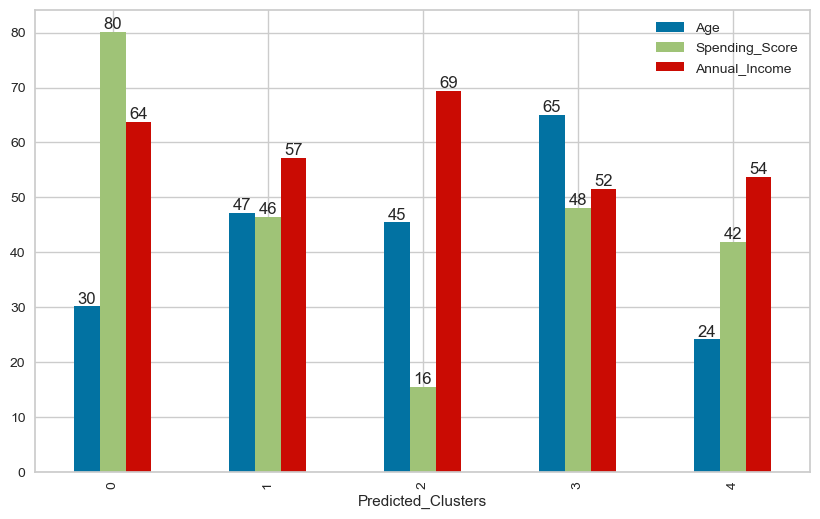

In [254]:
ax = X.groupby("Predicted_Clusters").mean().plot(kind='bar', figsize = (10,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

### Conclusion

**cluster 0** :The average age is around 30. The annual_income is high and spending_scores are very high. 
This group consists of our **loyal customers**. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it. 

**cluster 2**: The average age is around 45, The annual_income is high but the spending_scores are very low. 
This group is our **target audience** and specific strategies should be developed to drive this group to spend.

#### Interpretation based on Annual Income and Spending Score- x2

In [255]:
df_Female = df0[df0["Gender"] == "Female"][["Age", "Annual_Income", "Spending_Score"]]
df_Male = df0[df0["Gender"] == "Male"][["Age", "Annual_Income", "Spending_Score"]]

In [256]:
df_Female["Predicted_Clusters"] = clusters_X1
df_Male["Predicted_Clusters"] = clusters_X2

In [257]:
df_Female.groupby("Predicted_Clusters").mean()

,Age,Annual_Income,Spending_Score
Predicted_Clusters,,,
0,41.388889,89.055556,23.722222
1,41.521739,54.543478,49.521739
2,25.461538,25.692308,80.538462
3,43.214286,27.357143,21.714286
4,32.190476,86.047619,81.666667


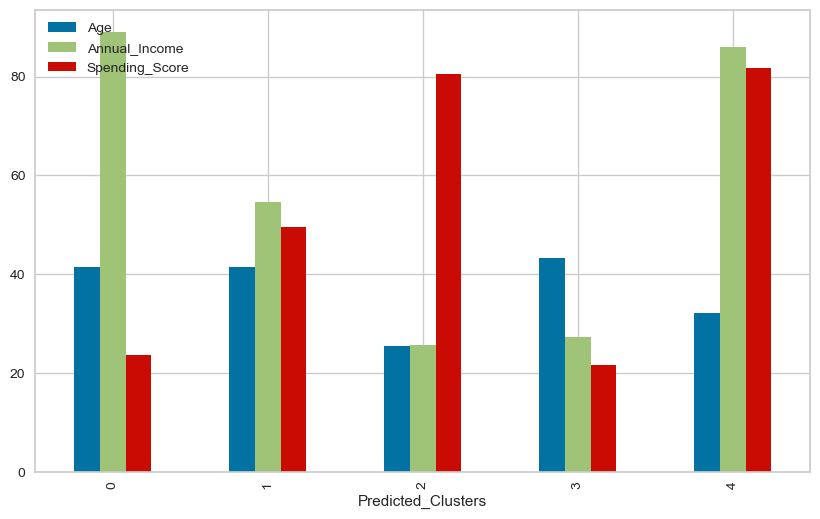

In [258]:
df_Female.groupby("Predicted_Clusters").mean().plot(kind="bar", figsize=(10,6));

In [259]:
df_Male.groupby("Predicted_Clusters").mean()

,Age,Annual_Income,Spending_Score
Predicted_Clusters,,,
0,45.441176,54.735294,49.852941
1,33.277778,87.111111,82.666667
2,39.315789,85.894737,12.947368
3,25.000000,25.777778,77.666667
4,48.375000,22.875000,17.625000


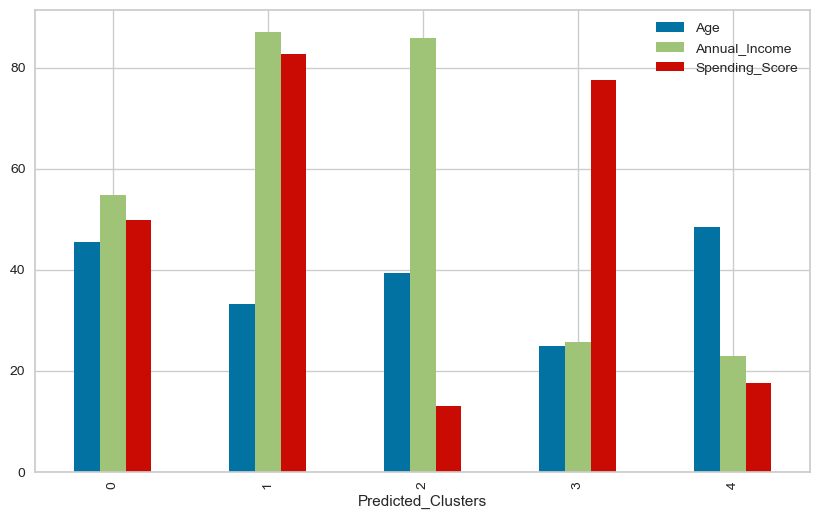

In [260]:
df_Male.groupby("Predicted_Clusters").mean().plot(kind="bar", figsize=(10,6));

<Figure size 1200x600 with 0 Axes>

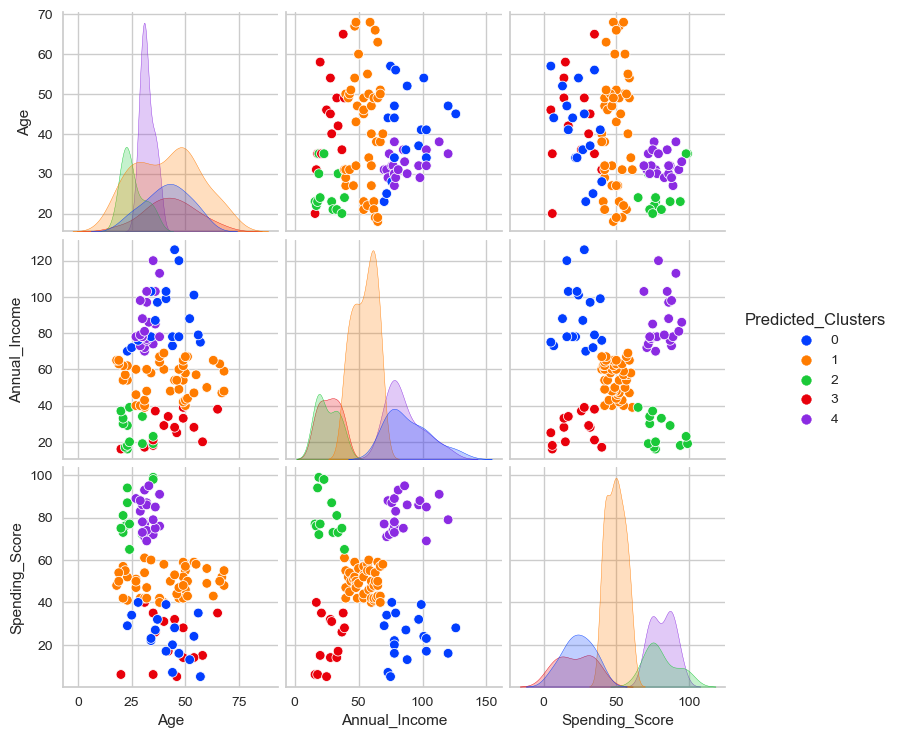

In [261]:
plt.figure(figsize = (12,6))
sns.pairplot(df_Female, hue= "Predicted_Clusters", palette="bright");

<Figure size 1200x600 with 0 Axes>

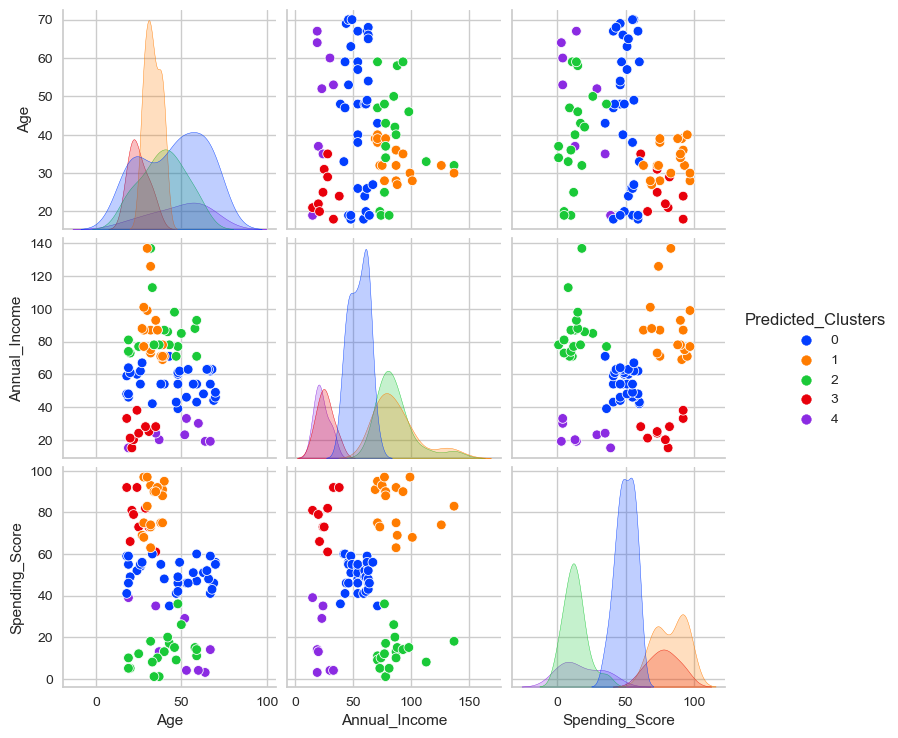

In [262]:
plt.figure(figsize = (12,6))
sns.pairplot(df_Male, hue= "Predicted_Clusters", palette="bright");

In [263]:
df_Female.groupby("Predicted_Clusters").describe().T

Predicted_Clusters             0          1          2          3           4
Age            count   18.000000  46.000000  13.000000  14.000000   21.000000
               mean    41.388889  41.521739  25.461538  43.214286   32.190476
               std     10.181522  14.744851   5.221995  11.682851    3.076021
               min     23.000000  18.000000  20.000000  20.000000   27.000000
               25%     34.500000  29.500000  22.000000  35.250000   30.000000
               50%     42.500000  44.000000  23.000000  43.500000   32.000000
               75%     47.000000  50.000000  30.000000  49.000000   35.000000
               max     57.000000  68.000000  35.000000  65.000000   38.000000
Annual_Income  count   18.000000  46.000000  13.000000  14.000000   21.000000
               mean    89.055556  54.543478  25.692308  27.357143   86.047619
               std     16.748915   9.064477   8.239990   8.063280   14.157953
               min     70.000000  39.000000  16.000000  16.000000   70.000000
               25%     76.500000  47.250000  19.000000  20.250000   77.000000
               50%     83.000000  55.500000  23.000000  28.000000   79.000000
               75%    100.500000  62.000000  33.000000  33.750000   97.000000
               max    126.000000  69.000000  39.000000  39.000000  120.000000
Spending_Score count   18.000000  46.000000  13.000000  14.000000   21.000000
               mean    23.722222  49.521739  80.538462  21.714286   81.666667
               std     10.242963   6.159867  10.697472  12.079408    7.831560
               min      5.000000  40.000000  65.000000   5.000000   69.000000
               25%     16.250000  43.250000  73.000000  14.000000   75.000000
               50%     23.500000  50.000000  77.000000  21.500000   83.000000
               75%     31.250000  54.750000  87.000000  31.750000   88.000000
               max     40.000000  61.000000  99.000000  40.000000   95.000000

In [264]:
df_Male.groupby("Predicted_Clusters").describe().T

Predicted_Clusters            0           1           2          3          4
Age            count  34.000000   18.000000   19.000000   9.000000   8.000000
               mean   45.441176   33.277778   39.315789  25.000000  48.375000
               std    18.289244    4.389902   12.867067   5.612486  16.612710
               min    18.000000   27.000000   19.000000  18.000000  19.000000
               25%    26.250000   30.000000   32.500000  21.000000  36.500000
               50%    48.000000   32.000000   40.000000  24.000000  52.500000
               75%    62.000000   37.500000   47.500000  29.000000  61.000000
               max    70.000000   40.000000   59.000000  35.000000  67.000000
Annual_Income  count  34.000000   18.000000   19.000000   9.000000   8.000000
               mean   54.735294   87.111111   85.894737  25.777778  22.875000
               std     8.324148   18.929867   16.110365   6.960204   6.034129
               min    39.000000   69.000000   71.000000  15.000000  15.000000
               25%    48.000000   73.500000   77.000000  21.000000  19.000000
               50%    54.000000   82.500000   81.000000  25.000000  21.500000
               75%    62.000000   91.750000   87.500000  28.000000  25.500000
               max    71.000000  137.000000  137.000000  38.000000  33.000000
Spending_Score count  34.000000   18.000000   19.000000   9.000000   8.000000
               mean   49.852941   82.666667   12.947368  77.666667  17.625000
               std     6.858449   11.103788    8.422679  10.606602  14.676877
               min    35.000000   63.000000    1.000000  61.000000   3.000000
               25%    46.000000   74.250000    8.500000  73.000000   4.000000
               50%    50.000000   85.500000   12.000000  79.000000  13.500000
               75%    55.000000   91.750000   16.000000  82.000000  30.500000
               max    60.000000   97.000000   36.000000  92.000000  39.000000

In [265]:
X1 = df0[["Annual_Income", "Spending_Score"]]

In [266]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [267]:
model_X1 = KMeans(n_clusters = 5, random_state=42)
model_X1.fit_predict(X1)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [268]:
clusters_X1 = model_X1.labels_

In [269]:
X1 = df0[["Annual_Income", "Spending_Score", "Age","Gender"]]

In [270]:
X1["Predicted_Clusters"] = clusters_X1

In [271]:
X1.groupby("Predicted_Clusters").describe().T

Predicted_Clusters            0           1          2          3           4
Annual_Income  count  81.000000   35.000000  23.000000  22.000000   39.000000
               mean   55.296296   88.200000  26.304348  25.727273   86.538462
               std     8.988109   16.399067   7.893811   7.566731   16.312485
               min    39.000000   70.000000  15.000000  15.000000   69.000000
               25%    48.000000   77.500000  19.500000  19.250000   75.500000
               50%    54.000000   85.000000  25.000000  24.500000   79.000000
               75%    62.000000   97.500000  33.000000  32.250000   95.000000
               max    76.000000  137.000000  39.000000  39.000000  137.000000
Spending_Score count  81.000000   35.000000  23.000000  22.000000   39.000000
               mean   49.518519   17.114286  20.913043  79.363636   82.128205
               std     6.530909    9.952154  13.017167  10.504174    9.364489
               min    34.000000    1.000000   3.000000  61.000000   63.000000
               25%    44.000000   10.000000   9.500000  73.000000   74.500000
               50%    50.000000   16.000000  17.000000  77.000000   83.000000
               75%    55.000000   23.500000  33.500000  85.750000   90.000000
               max    61.000000   39.000000  40.000000  99.000000   97.000000
Age            count  81.000000   35.000000  23.000000  22.000000   39.000000
               mean   42.716049   41.114286  45.217391  25.272727   32.692308
               std    16.447822   11.341676  13.228607   5.257030    3.728650
               min    18.000000   19.000000  19.000000  18.000000   27.000000
               25%    27.000000   34.000000  35.500000  21.250000   30.000000
               50%    46.000000   42.000000  46.000000  23.500000   32.000000
               75%    54.000000   47.500000  53.500000  29.750000   35.500000
               max    70.000000   59.000000  67.000000  35.000000   40.000000

In [272]:
X1.groupby("Predicted_Clusters").mean().T

Predicted_Clusters,0,1,2,3,4
Annual_Income,55.296296,88.200000,26.304348,25.727273,86.538462
Spending_Score,49.518519,17.114286,20.913043,79.363636,82.128205
Age,42.716049,41.114286,45.217391,25.272727,32.692308


In [273]:
X1.groupby(["Gender","Predicted_Clusters"]).mean().T

Gender                 Female                                            \
Predicted_Clusters          0        1          2          3          4   
Annual_Income       55.354167  90.9375  27.357143  25.692308  86.047619   
Spending_Score      49.000000  22.0625  21.714286  80.538462  81.666667   
Age                 40.895833  43.2500  43.214286  25.461538  32.190476   

Gender                   Male                                              
Predicted_Clusters          0          1          2          3          4  
Annual_Income       55.212121  85.894737  24.666667  25.777778  87.111111  
Spending_Score      50.272727  12.947368  19.666667  77.666667  82.666667  
Age                 45.363636  39.315789  48.333333  25.000000  33.277778

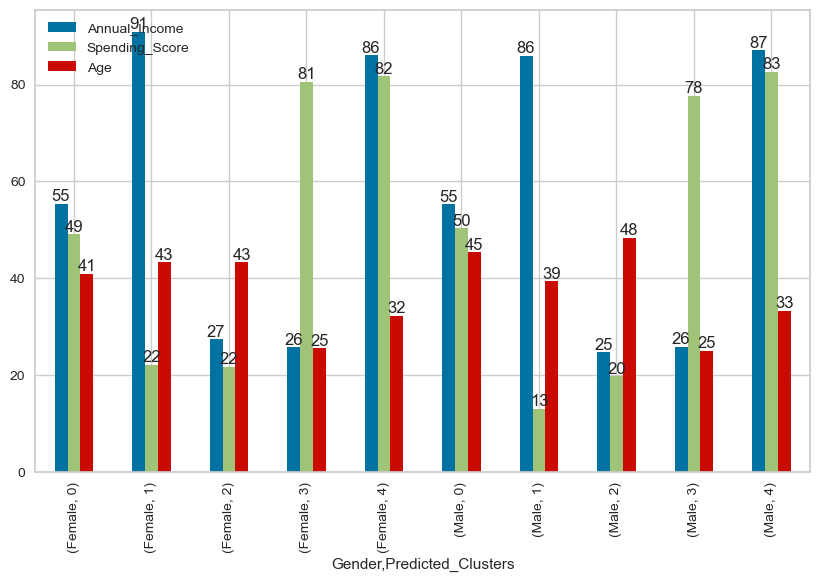

In [274]:
ax = X1.groupby(["Gender","Predicted_Clusters"]).mean().plot(kind='bar', figsize = (10,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f");

## Conclusion

### Female

**cluster 1**: The average age is around 43, the annual_income is very high but the spending_scores is low.
We can name this group as **target customers**.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. We can name this group as **loyal customers**. Our company's main profit is from this group. 

### Male

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
We can name this group as **target customers**.    

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. We can name this group as **loyal customers**. Our company's main profit is from this group.